Machine Learning Algorithm
- 지도학습
- 비지도 학습
- 강화 학습

지도학습

kNN(k-Nearest Neighbor)

In [208]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split #데이터 전처리 - train, test 분리 random_state=42
from sklearn.neighbors import KNeighborsClassifier #분류/ 데이터 학습하기
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression #선형회귀
from sklearn.preprocessing import PolynomialFeatures #끝난 뒤 특성을 추가해서 모델을 적용
from sklearn.preprocessing import StandardScaler #표준화작업 (instead of 데이터값 - 평균/ 표준편차) - 전처리 전
from sklearn.linear_model import Ridge #릿지회귀
from scipy.special import softmax # 행 하나하나 1로 맞춤
from sklearn.linear_model import LogisticRegression #로지스틱 - 맞출 확률을 나타내는 것(1에 가깝게)
from sklearn.linear_model import SGDClassifier #경사하강법 - 머신러닝을 훈련하는 방법, 다 끝나고 정답률 높이기 위해 
from statsmodels.stats.outliers_influence import variance_inflation_factor #회귀분석 예측 - 고려사항 체크
import statsmodels.api as sm # train set 평가서 볼 수 있는 모듈
from sklearn.model_selection import cross_validate # 머신러닝 - cross_validate
from sklearn.ensemble import RandomForestClassifier
from collections import Counter #counter 함수
from sklearn.feature_extraction.text import CountVectorizer # 전체단어에서 각 단어에 번호를 생성부여
from scipy import stats # t-test
from tensorflow import keras
from konlpy.tag import Okt  #텍스트마이닝
from sklearn.preprocessing import MinMaxScaler
import operator
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import seaborn as sns
import glob,os.path,re
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [210]:
from sklearn.neighbors import KNeighborsClassifier # classifier 분류기

$$
    \begin{pmatrix}
    1 & 2 \\
    2 & 3 \\
    3 & 4 \\
    6 & 7 \\
    7 & 8 \\
    8 & 9 \\
    \end{pmatrix}
$$

x_train = np.array([[i, i+1] for i in range(1,9) if i not in (4,5)])

In [211]:
# train 용
x_train = np.array([[i, i+1] for i in range(1,9) if i not in (4,5)])
x_train
y_train = np.array([0,0,0,1,1,1])
# 지도학습용이므로 train에 대한 답(y_train)도 제시해야 됨

In [212]:
# 모델 테스트용 데이터
x_test = np.array([[6,4]])


In [213]:
# knn setting
k =3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [214]:
# test
predicted_label = knn.predict(x_test)

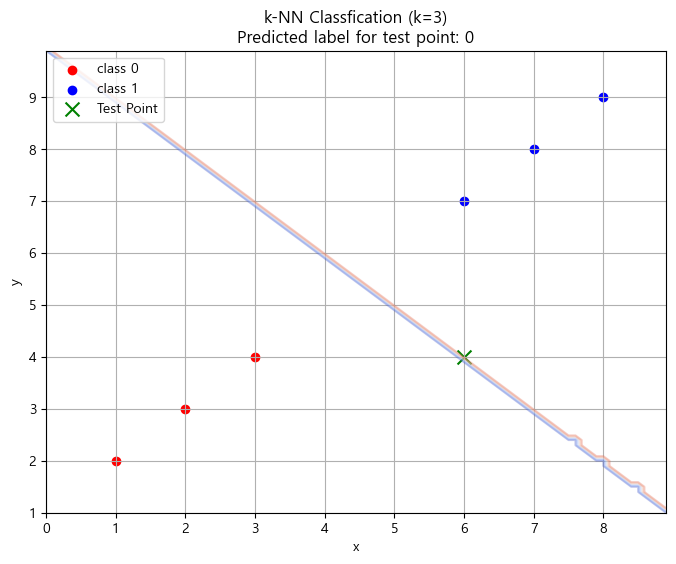

In [215]:
plt.figure(figsize=(8,6))
for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o', 
label = 'class 0' if y_train[i] ==0 and i ==0 else ('class 1' if y_train[i] ==1 and i == 3 else ''))
    
plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label = 'Test Point')

x_min, x_max = x_train[:, 0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:, 1].min()-1, x_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

z= knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contour(xx, yy, z, alpha = 0.3, cmap = plt.cm.coolwarm) # alpha 농도/ coolwarm 색깔나누기

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'k-NN Classfication (k={k})\nPredicted label for test point: {predicted_label[0]}')
plt.grid(True)
plt.show()

SVM(support vector machine)

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [217]:
# 복잡한 샘플 생성
x_train, y_train = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=2)

# test 데이터
x_test = np.array([[0,0]])

In [218]:
# 모델 생성
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [219]:
# 예측
predicted_label = svm_model.predict(x_test)

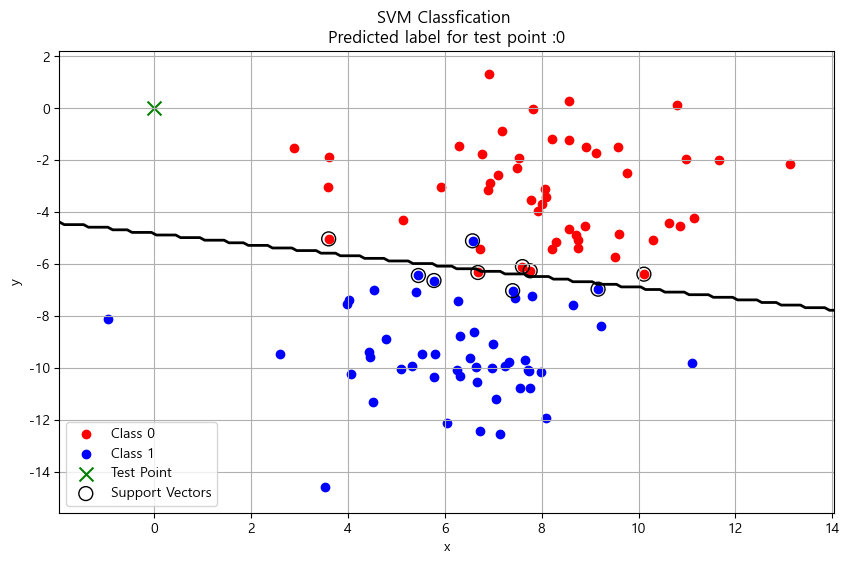

In [220]:
# 시각화
plt.figure(figsize=(10,6))
for i, point in enumerate(x_train):
    plt.scatter(point[0],point[1], c='r' if y_train[i]==0 else 'b', marker='o',
                label = 'Class 0' if y_train[i]== 0 and i == 0 else('Class 1' if y_train[i]==1 and i==1 else ''))
plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')
x_min, x_max = x_train[:,0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max,0.1))
z= svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
z= z.reshape(xx.shape)

plt.contour(xx, yy, z, levels = [0], linewidths=2, colors='k')
# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=100, facecolors = 'none', edgecolors='k',
            label="Support Vectors")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"SVM Classfication \nPredicted label for test point :{predicted_label[0]}")
plt.grid(True)
plt.show()


In [221]:
def scatter_vis(x_train,y_train,x_test, model,figsize = (6,6)):
    """ _summary_
    Args:
        x_train(_type_):훈련 데이터 셋
        y_train(_type_):훈련 데이터 레이블
        x_test(_type_): 테스트용 데이터
        x_train(_type_): 만든 머신러닝 모델 작성
        figsize (tuple, optional): Defaults to (6,6).
    """
    plt.figure(figsize=figsize)
    for i, point in enumerate(x_train):
        plt.scatter(point[0],point[1], c='r' if y_train[i]==0 else 'b', marker='o',
                    label = 'Class 0' if y_train[i]== 0 and i == 0 else('Class 1' if y_train[i]==1 and i==1 else ''))
    plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')
    x_min, x_max = x_train[:,0].min()-1, x_train[:,0].max()+1
    y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max,0.1))
    z= svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    z= z.reshape(xx.shape)
    return xx,yy,z   

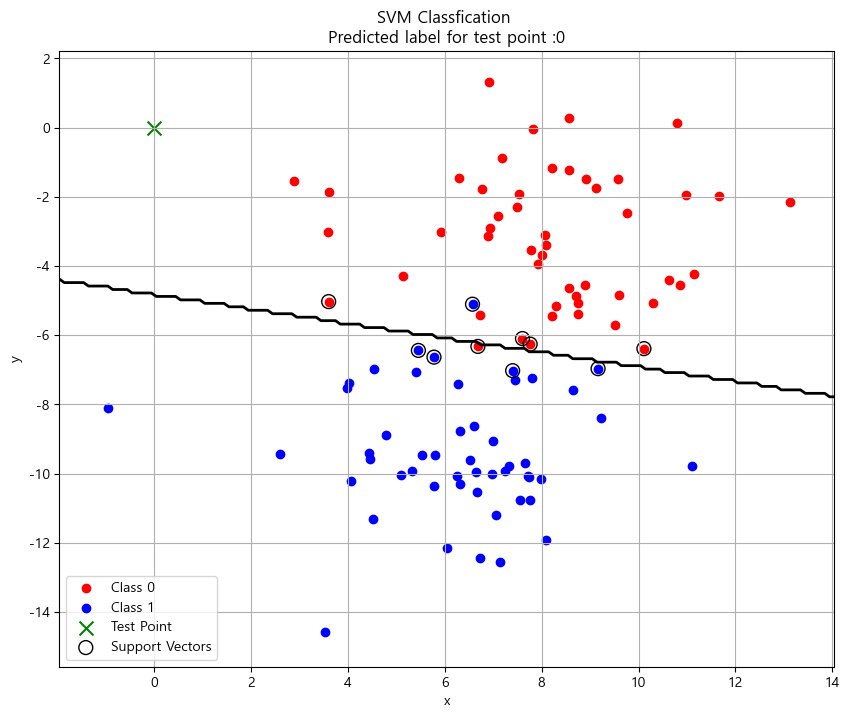

In [222]:
scatter_vis(x_train, y_train, x_test, svm_model, figsize=(10,8))  
plt.contour(xx, yy, z, levels = [0], linewidths=2, colors='k')
# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=100, facecolors = 'none', edgecolors='k',
            label="Support Vectors")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"SVM Classfication \nPredicted label for test point :{predicted_label[0]}")
plt.grid(True)
plt.show()

Decision Tree

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [224]:
# 복잡한 샘플 데이터 생성
x_train, y_train = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                                       random_state=42)

# 테스트 데이터
x_test = np.array([[0,0]])

In [225]:
# DC 트리 훈련
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [226]:
# 예측
predicted_label = tree_model.predict(x_test)

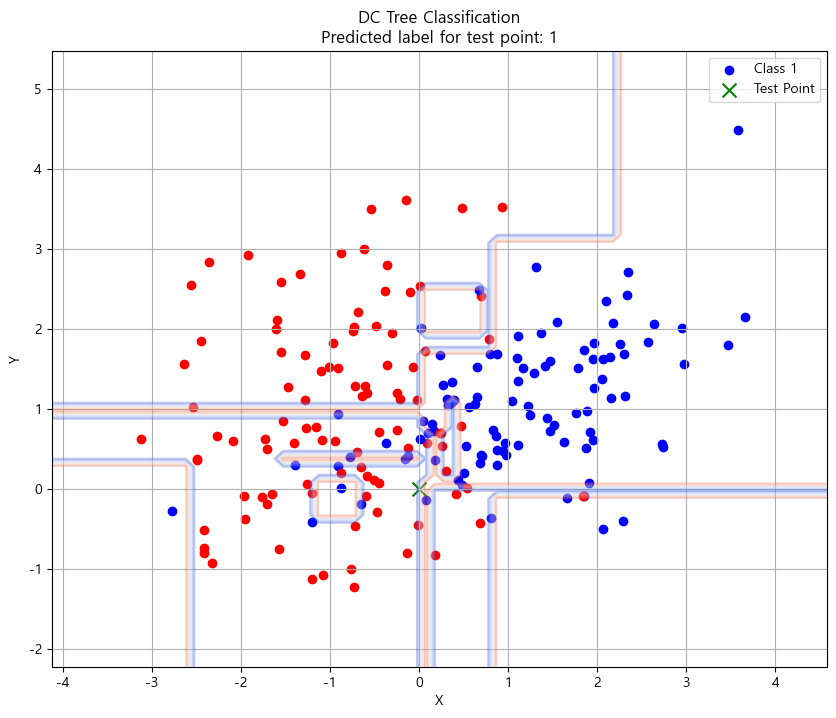

In [232]:
# 트리모델 시각화
# 시각화
plt.figure(figsize=(10, 8))
for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))
plt.scatter(x_test[0, 0], x_test[0, 1], c='g', marker='x', s=100, label='Test Point')
x_min, x_max = x_train[:, 0].min()-1, x_train[:, 0].max()+1
y_min, y_max = x_train[:, 1].min()-1, x_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"DC Tree Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()


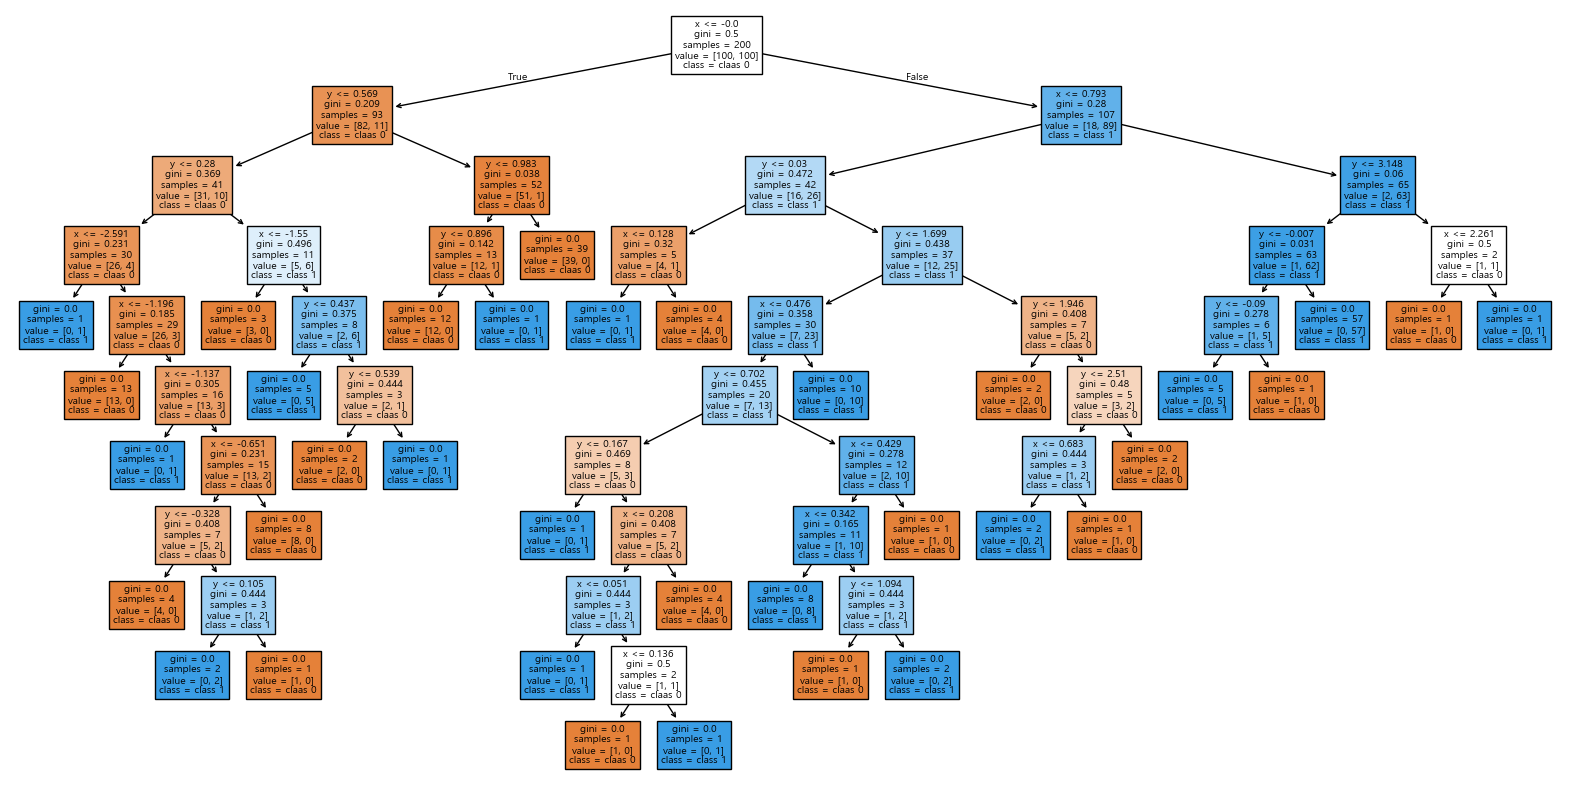

In [233]:
# 의사결정나무 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled = True, feature_names=['x','y'],class_names=['claas 0', 'class 1'])
plt.show()